### Load data

In [0]:
df = spark.read.table('default.housing').toPandas()
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


### EDA

In [0]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [0]:
df.isna().any()

longitude             False
latitude              False
housing_median_age    False
total_rooms           False
total_bedrooms         True
population            False
households            False
median_income         False
median_house_value    False
ocean_proximity       False
dtype: bool

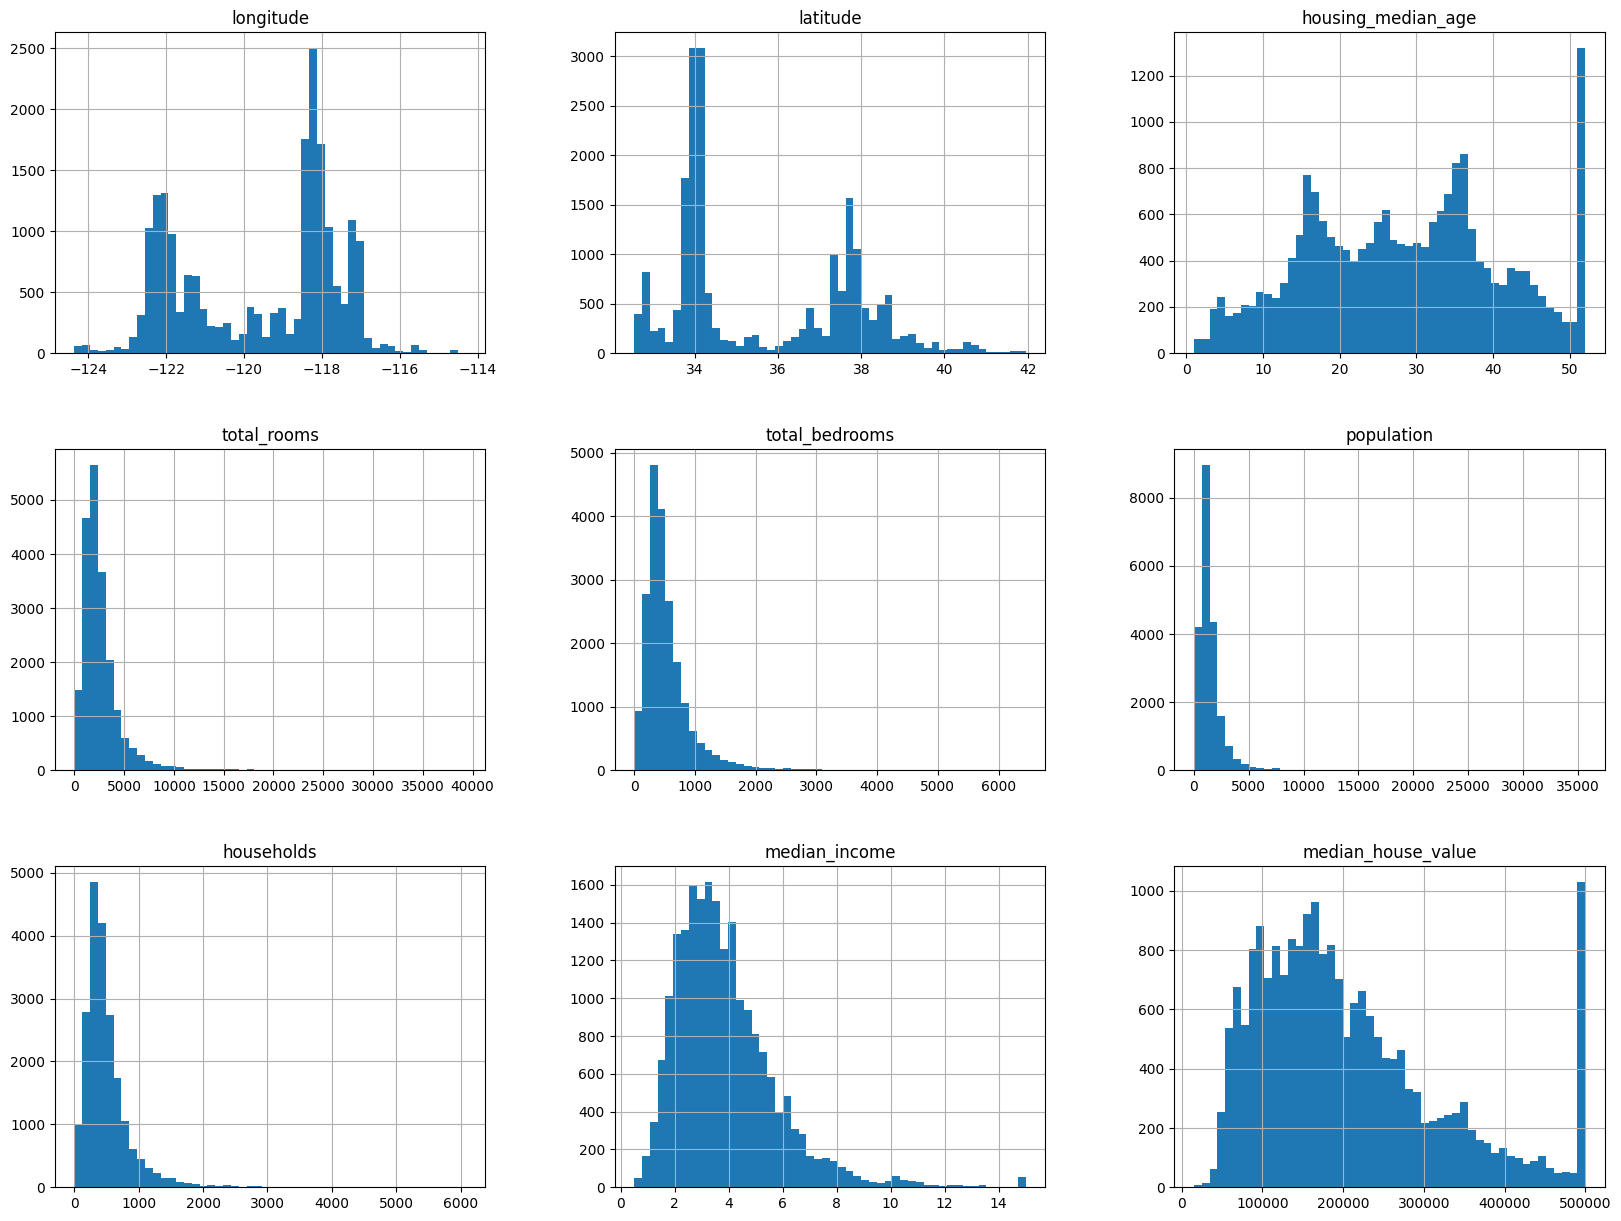

In [0]:
import matplotlib.pyplot as plt

df.hist(bins=50, figsize=(20, 15))
plt.show()

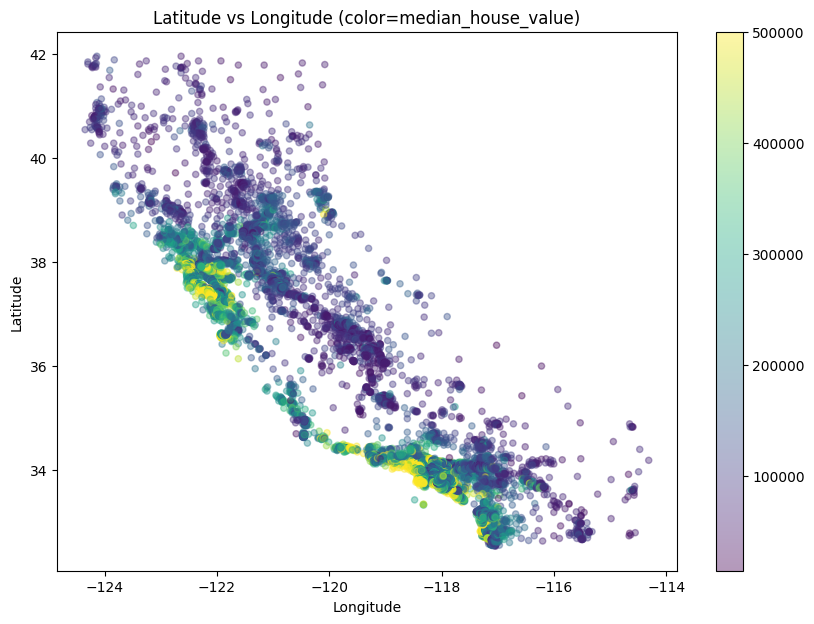

In [0]:
import matplotlib.pyplot as plt

df[['longitude', 'latitude']].plot(
    kind='scatter',
    x='longitude',
    y='latitude',
    c=df['median_house_value'],
    cmap='viridis',
    alpha=0.4,
    figsize=(10, 7)
)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Latitude vs Longitude (color=median_house_value)')
plt.show()

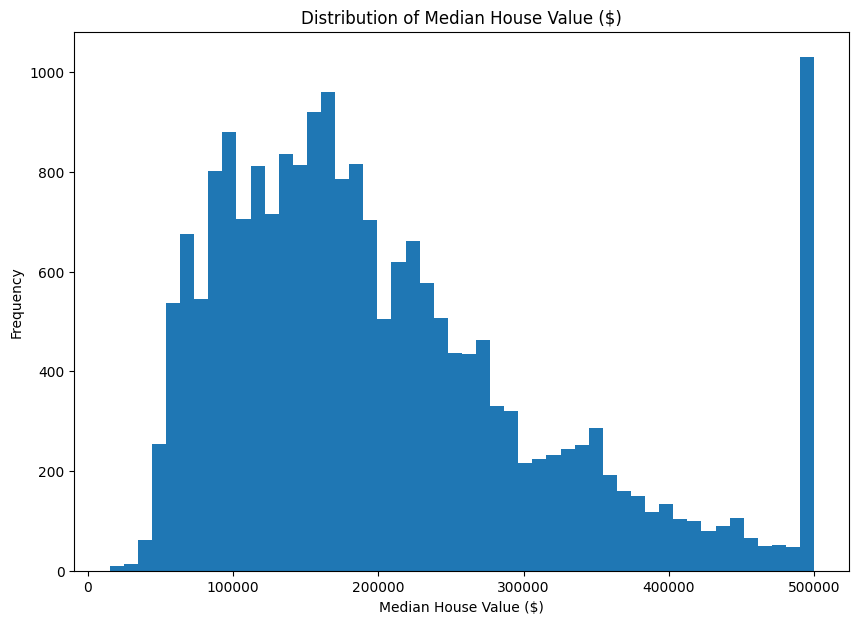

In [0]:
import matplotlib.pyplot as plt

df['median_house_value'].plot(
    kind='hist',
    bins=50,
    figsize=(10, 7),
    title='Distribution of Median House Value ($)'
)
plt.xlabel('Median House Value ($)')
plt.ylabel('Frequency')
plt.show()

In [0]:
# the US census data set capped the value of median_house_value at $500,001. let's remove all those capped observations from the dataset
df = df[df['median_house_value'] != 500001]

# the US census data set capped the value of housing_median_age at 52. let's remove all those capped observations from the dataset
df = df[df['housing_median_age'] != 52]

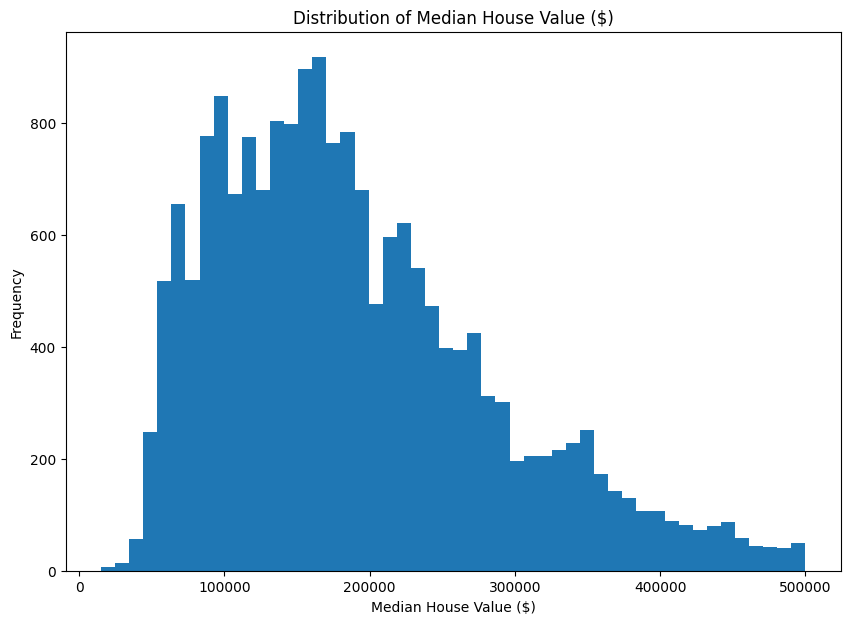

In [0]:
import matplotlib.pyplot as plt

df['median_house_value'].plot(
    kind='hist',
    bins=50,
    figsize=(10, 7),
    title='Distribution of Median House Value ($)'
)
plt.xlabel('Median House Value ($)')
plt.ylabel('Frequency')
plt.show()

/root/.ipykernel/330592/command-2677676053670247-1350304749:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


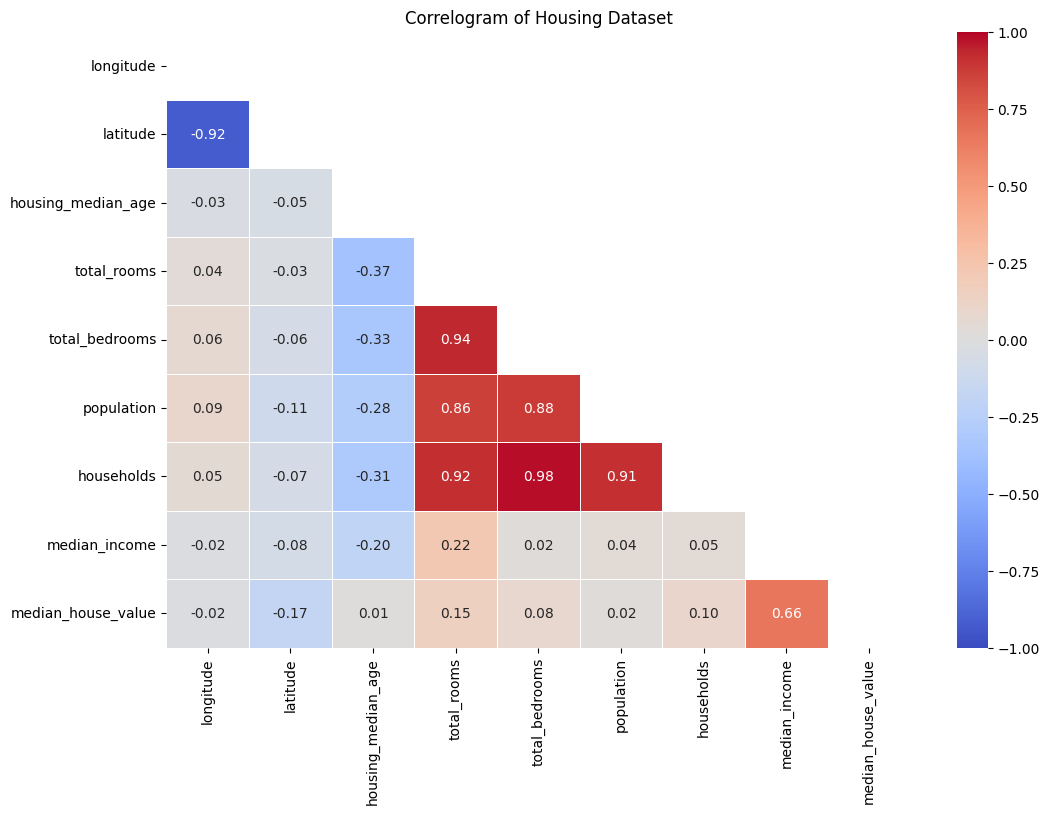

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Draw the heatmap with the mask
sns.heatmap(corr, mask=mask, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1, linewidths=.5)

plt.title('Correlogram of Housing Dataset')
plt.show()

In [0]:
# save to a parquet file so we can access df in other tasks
df.to_parquet('/dbfs/tmp/housing_data.parquet')